#  
<u><h1>Task-05</h1><hr></u>
<h3>Problem statement -</h3>
<p>Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.</p>
<h3>Dataset used - </h3><p>Road traffic accidents</p>
<h3>Source of the dataset -</h3>
<p>Kaggle</p>
<h3>Description -</h3>
<p>The dataset comprises road accident records with detailed information on various aspects such as the time and day of the accident, driver demographics, vehicle specifics, environmental conditions, and casualty details. Each record includes categorical variables indicating accident severity, providing a comprehensive overview of incidents.</p>
<h3>Aim -</h3>
<p>The aim of this analysis is to understand the factors contributing to road accidents and the severity of these accidents. By examining driver characteristics, environmental conditions, vehicle attributes, and casualty information, the study seeks to identify key patterns and relationships that could inform measures to enhance road safety.</p>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = r"C:\Users\Hp\Downloads\RTA Dataset.csv"
df = pd.read_csv(file_path)

In [5]:
print(df.head())
print(df.describe(include='all'))

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [21]:
# Data cleaning and preprocessing
df.columns = df.columns.str.strip()
df.dropna(inplace=True)

In [6]:
# Convert relevant columns to categorical types
categorical_columns = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 
                       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 
                       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 
                       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 
                       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 
                       'Light_conditions', 'Weather_conditions', 'Type_of_collision', 
                       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 
                       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 
                       'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 
                       'Accident_severity']

for col in categorical_columns:
    df[col] = df[col].astype('category')

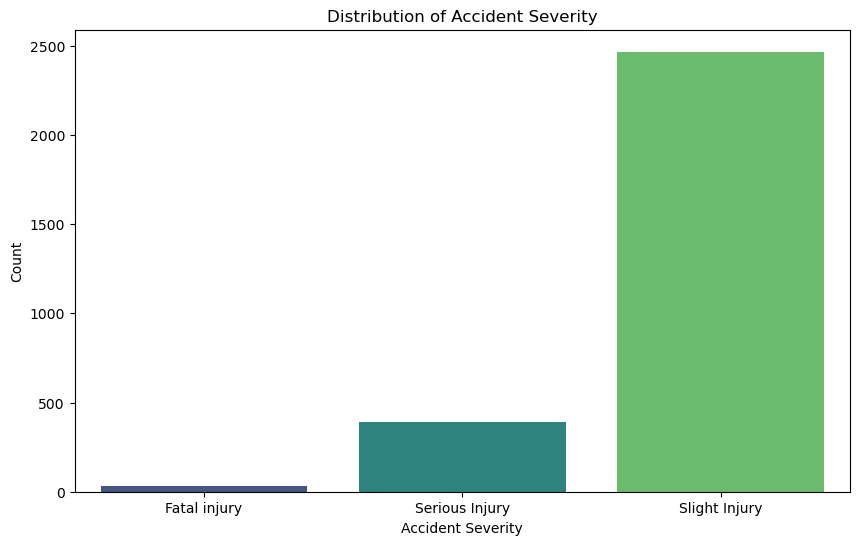

In [7]:
# Visualize the distribution of accident severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Accident_severity', palette='viridis')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

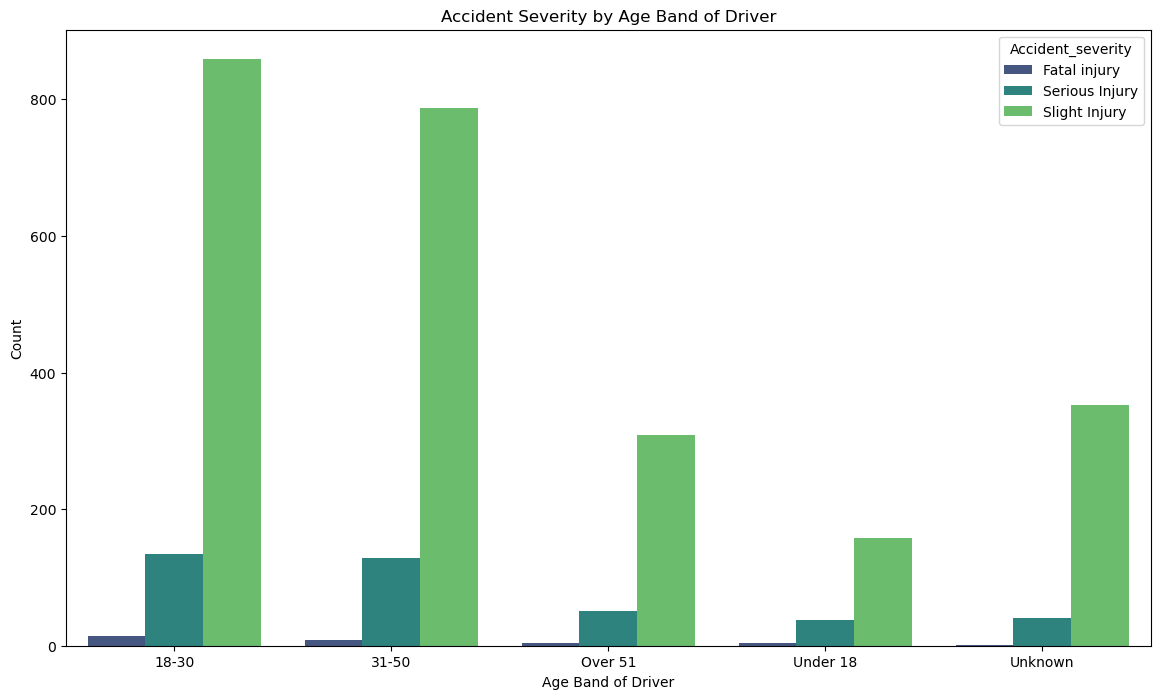

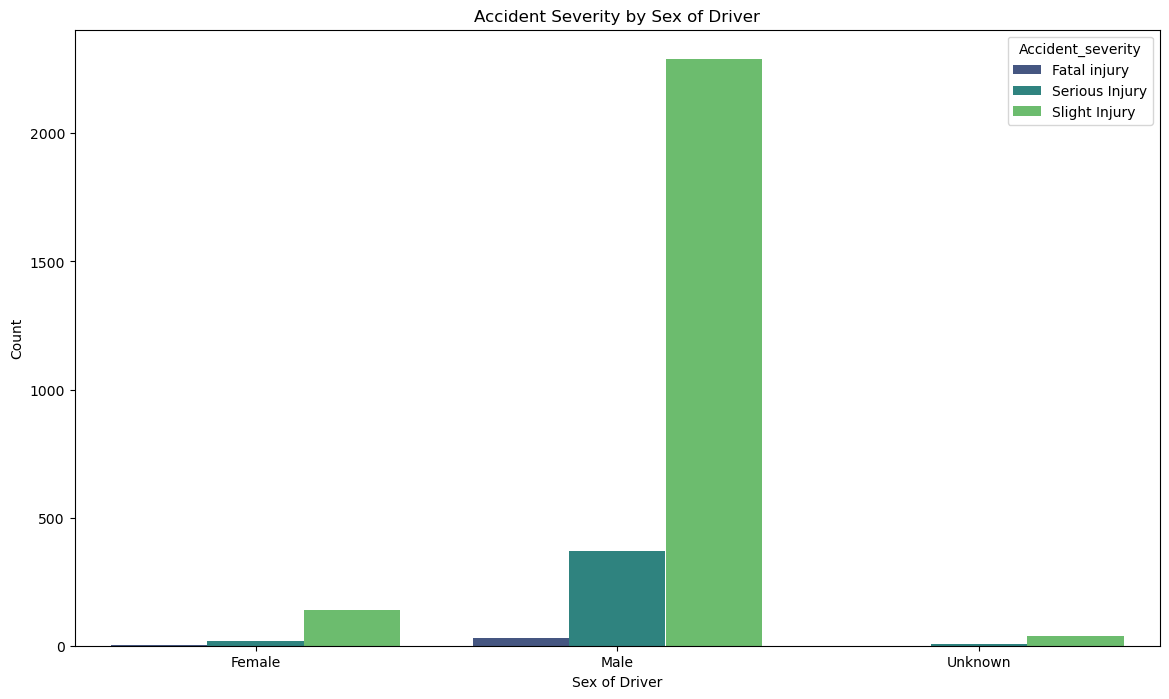

In [22]:
# Analyze the relationship between accident severity and driver characteristics
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Age_band_of_driver', hue='Accident_severity', palette='viridis')
plt.title('Accident Severity by Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Sex_of_driver', hue='Accident_severity', palette='viridis')
plt.title('Accident Severity by Sex of Driver')
plt.xlabel('Sex of Driver')
plt.ylabel('Count')
plt.show()

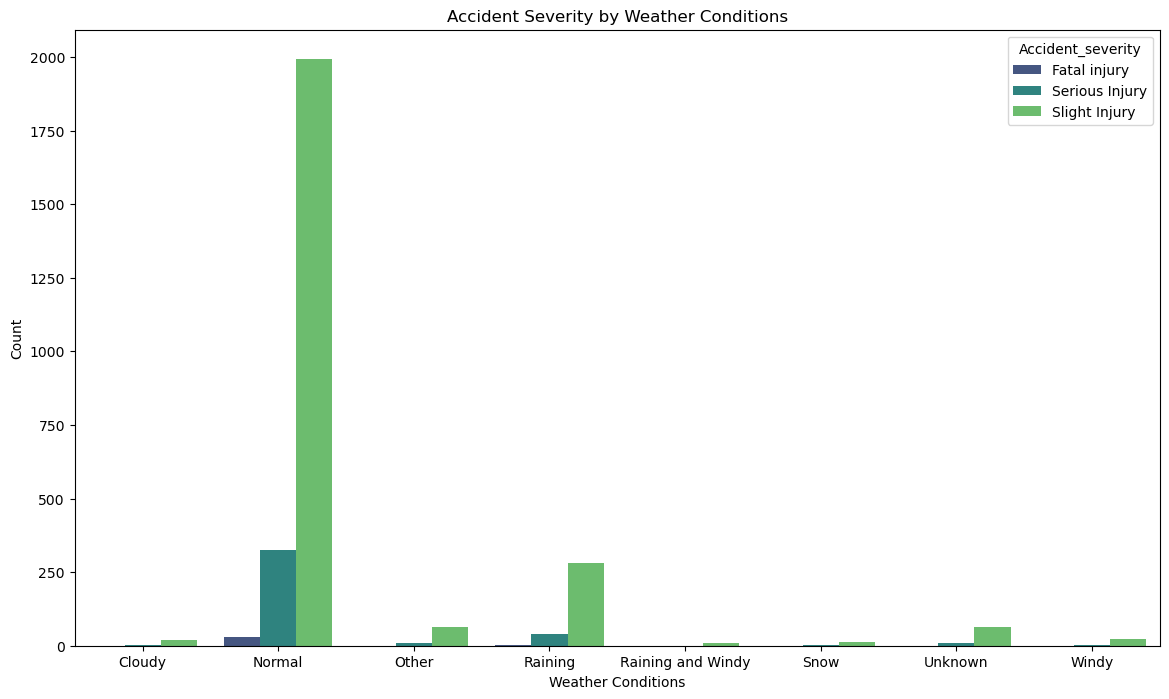

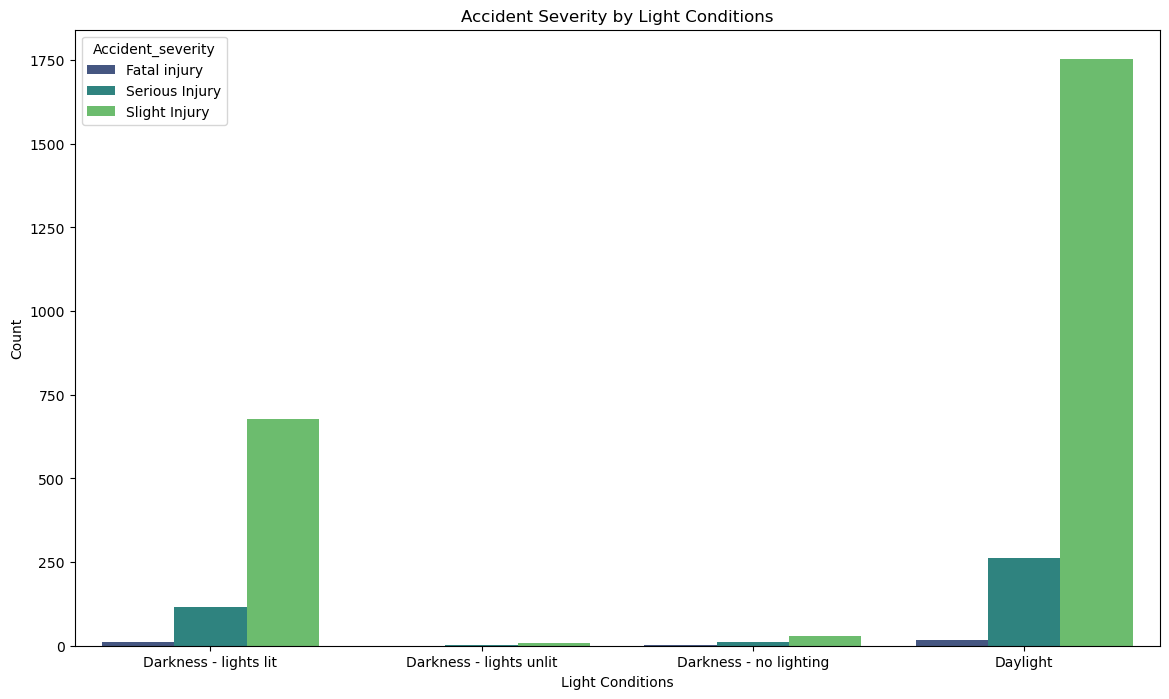

In [10]:
# Analyze the relationship between accident severity and environmental factors
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Weather_conditions', hue='Accident_severity', palette='viridis')
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Light_conditions', hue='Accident_severity', palette='viridis')
plt.title('Accident Severity by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.show()

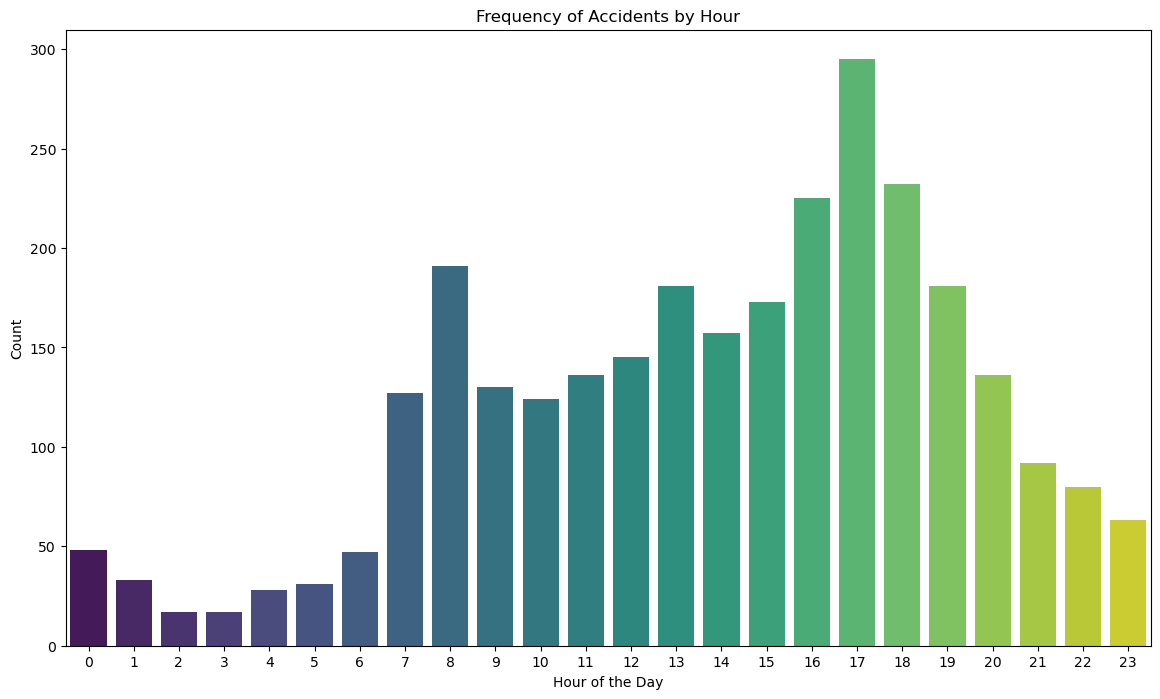

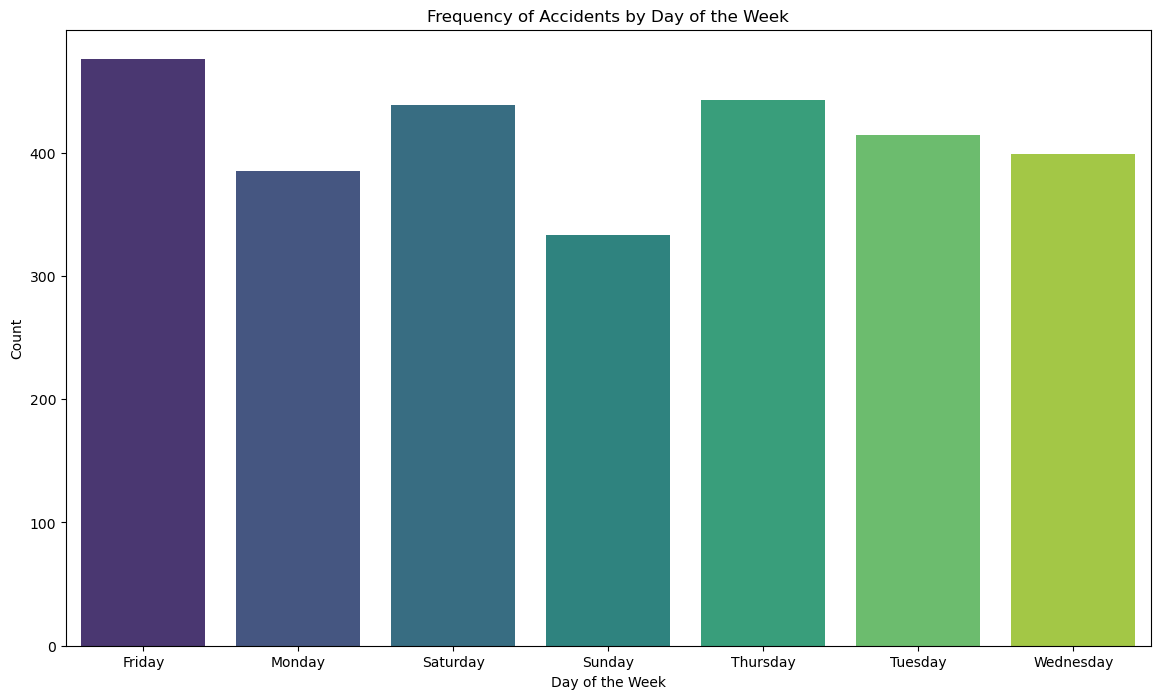

In [11]:
# Visualize the frequency of accidents over different times of the day and days of the week
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Time', palette='viridis')
plt.title('Frequency of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Day_of_week', palette='viridis')
plt.title('Frequency of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

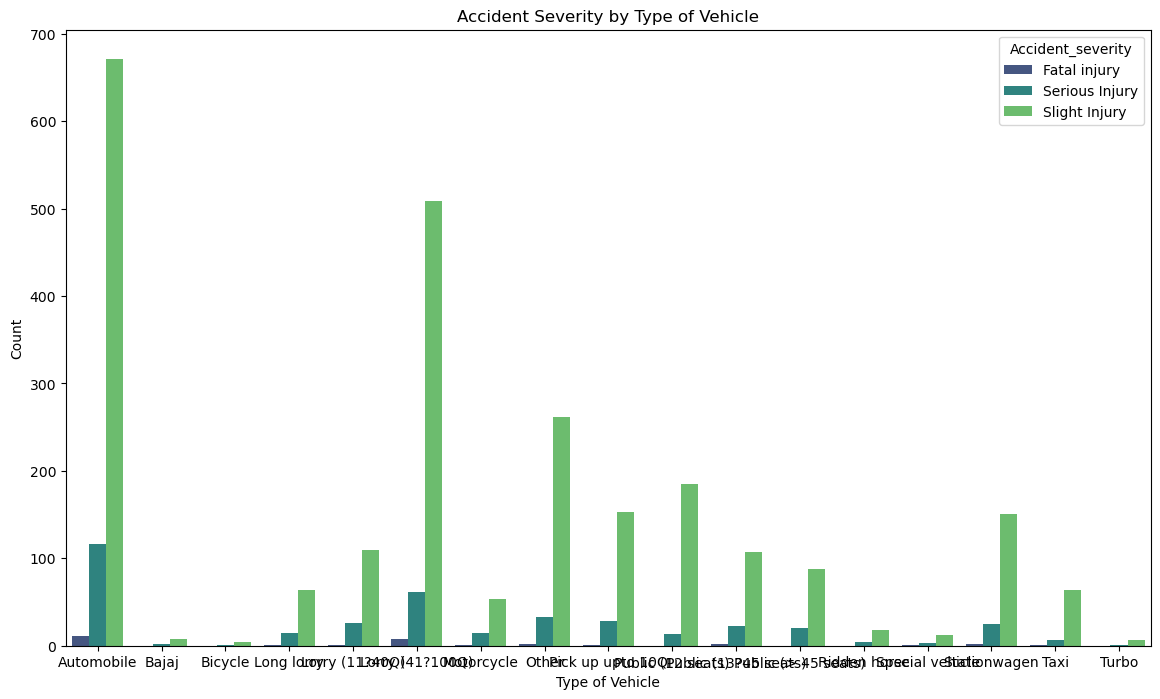

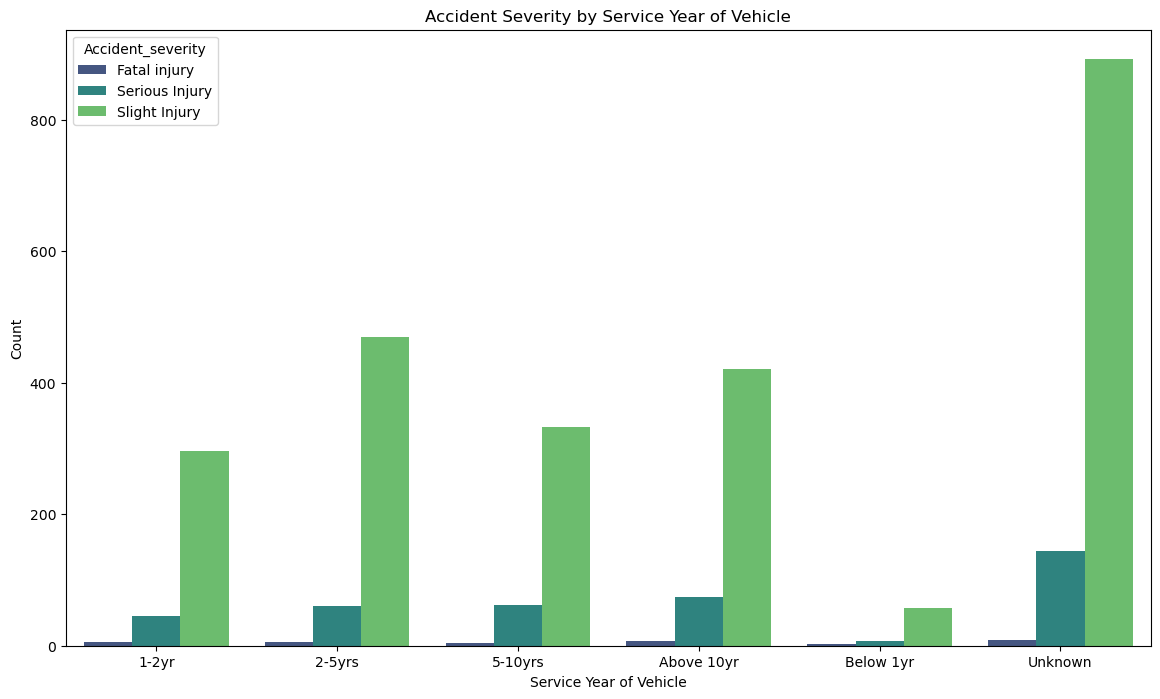

In [12]:
# Additional analysis: Relationship between accident severity and vehicle characteristics
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Type_of_vehicle', hue='Accident_severity', palette='viridis')
plt.title('Accident Severity by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Service_year_of_vehicle', hue='Accident_severity', palette='viridis')
plt.title('Accident Severity by Service Year of Vehicle')
plt.xlabel('Service Year of Vehicle')
plt.ylabel('Count')
plt.show()

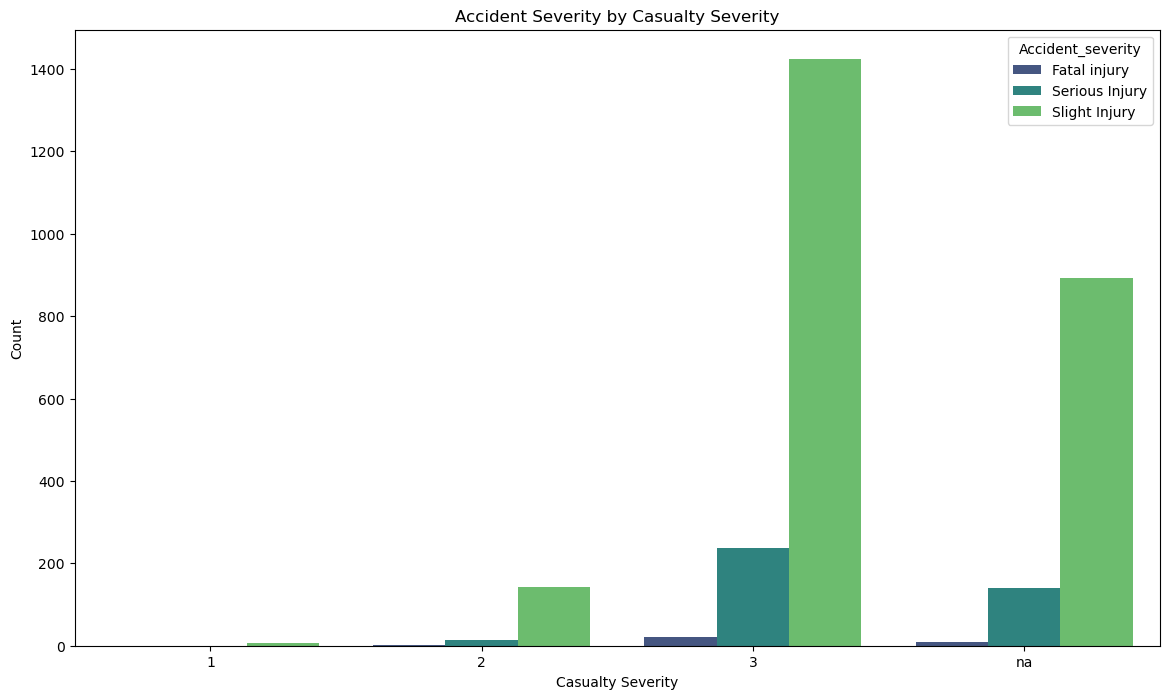

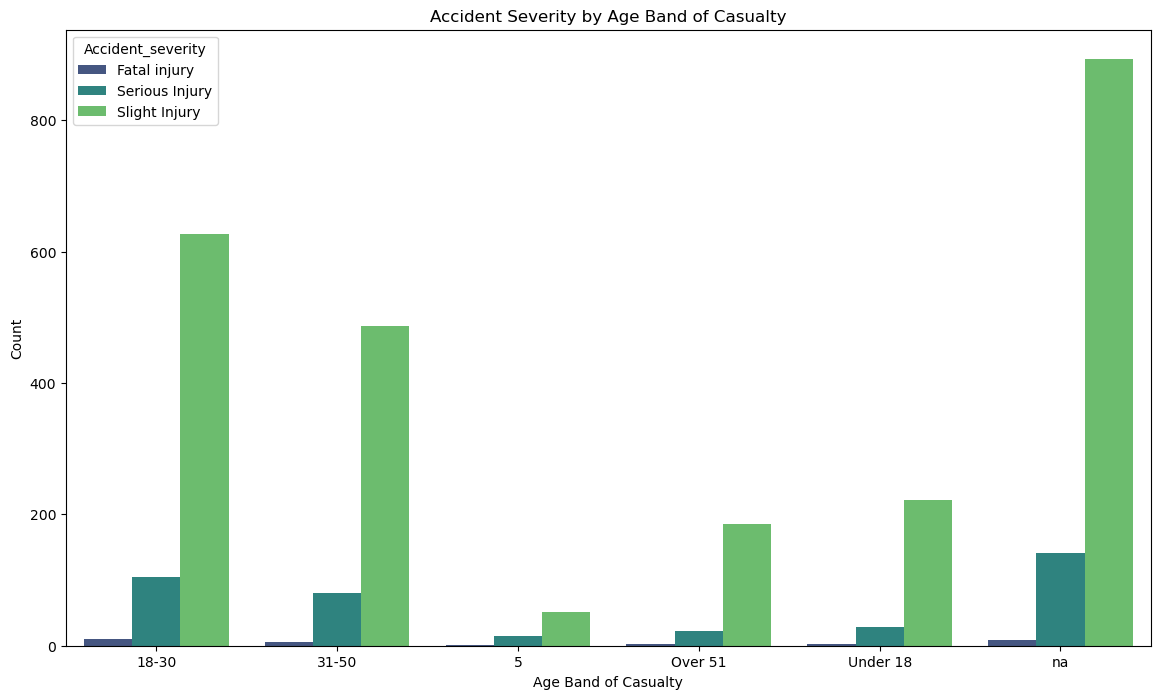

In [14]:
# Additional analysis: Relationship between accident severity and casualty characteristics
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Casualty_severity', hue='Accident_severity', palette='viridis')
plt.title('Accident Severity by Casualty Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Age_band_of_casualty', hue='Accident_severity', palette='viridis')
plt.title('Accident Severity by Age Band of Casualty')
plt.xlabel('Age Band of Casualty')
plt.ylabel('Count')
plt.show()

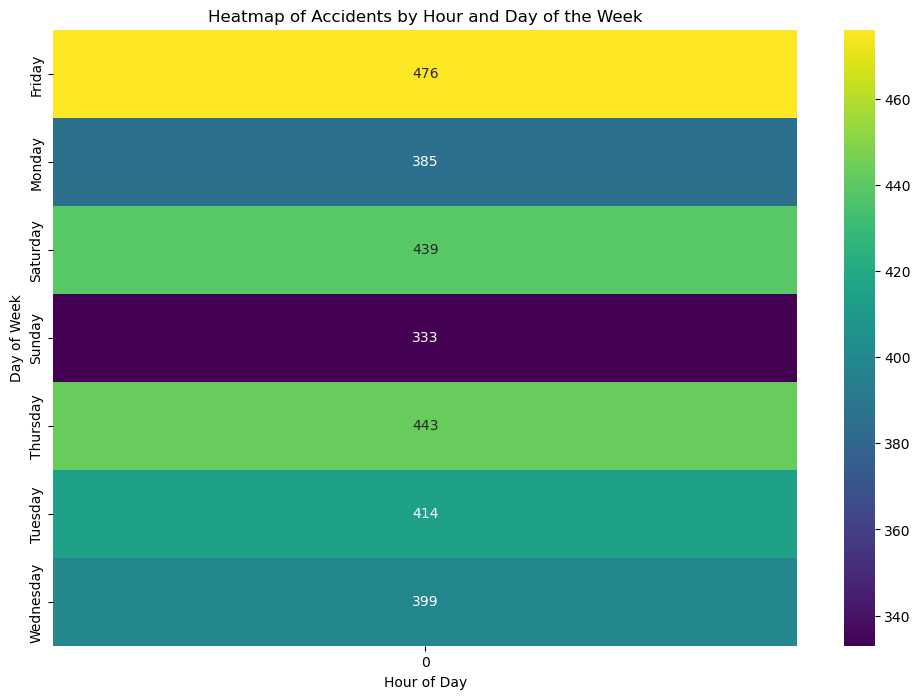

In [15]:
# Heatmap of accidents by hour and day of the week
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
accidents_by_hour_day = df.groupby(['Day_of_week', 'Hour']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(accidents_by_hour_day, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Accidents by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

# 

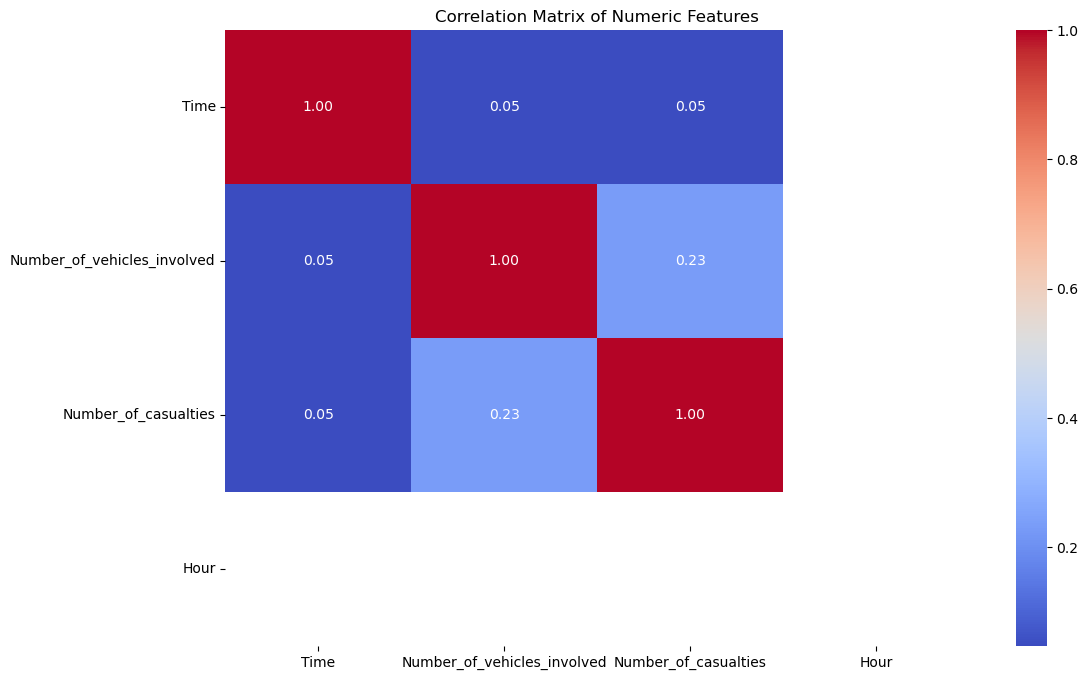

In [25]:
# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


# <h3>Inference</h3>
<p>The analysis shows that most accidents are minor, but severe ones are crucial to tackle. Younger and male drivers are often involved in severe accidents. Bad weather and poor lighting increase accident severity. Older vehicles and certain types are more likely to be in severe accidents. Certain groups, like pedestrians and specific age ranges, are more vulnerable. Targeted interventions are needed to cut down on accidents and their severity.</p>